In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE2 import lhs
from mandelbrot import *
from scipy.stats import ttest_ind
import time

1000000
253445
area =  1.52067


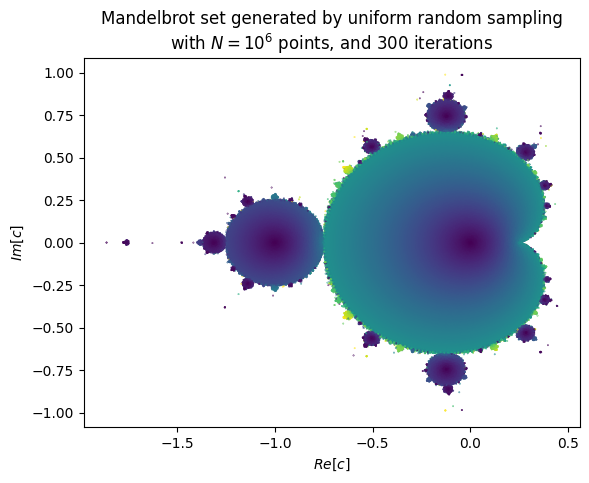

In [3]:
num_points = int(1E6)
iterations = 300
plot_mandelbrot(num_points=num_points, iterations=iterations)

In [27]:

start_time = time.time()
best_area_value, best_area_std, best_area_conf = estimate_area(int(1E6), 10, 200, 10)
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value, best_area_std, best_area_conf)

Execution Time: 0.9992210865020752 seconds
1.5341999999999998 0.068780520498176 [1.4823358842993324, 1.5860641157006672]


In [22]:

start_time = time.time()
best_area_value_lhs, best_area_std_lhs, best_area_conf_lhs = estimate_area(int(1E6), 10, 200, 10, method='lhs')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_lhs, best_area_std_lhs, best_area_conf_lhs)

Execution Time: 0.8237795829772949 seconds
1.4700000000000002 2.220446049250313e-16 [1.47, 1.4700000000000004]


In [25]:
start_time = time.time()
best_area_value_ortho, best_area_std_ortho, best_area_conf_ortho = estimate_area(int(1E6), 10, 200, 10, method='ortho')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_ortho, best_area_std_ortho, best_area_conf_ortho)

Execution Time: 1.013211965560913 seconds
1.5290322580645161 0.02116351873882829 [1.5130738562299015, 1.5449906598991308]


In [26]:
start_time = time.time()
best_area_value_cutout, best_area_std_cutout, best_area_conf_cutout = estimate_area(int(1E6), 10, 200, 10, method='cutout')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_cutout, best_area_std_cutout, best_area_conf_cutout)

Execution Time: 1.1230957508087158 seconds
1.5093736354218763 0.07327712749058296 [1.454118842482574, 1.5646284283611787]


In [34]:
num_points = int(1E4)
iterations = 100
intermediate_steps = 10 
repetitions = 40
average_areas_uniform, average_lengths_uniform = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions)

average_areas_lhs, average_lengths_lhs = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='lhs')

average_areas_ortho, average_lengths_ortho = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='ortho')

average_areas_cutout, average_lengths_cutout = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='cutout')


c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:11: RuntimeWarning: overflow encountered in scalar multiply
  z.append(z[k] * z[k] + c)
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  z.append(z[k] * z[k] + c)
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar multiply
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar add
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))


Text(0, 0.5, 'estimated mean area')

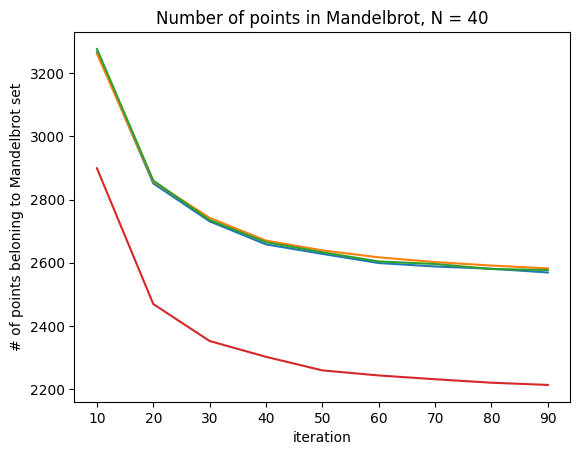

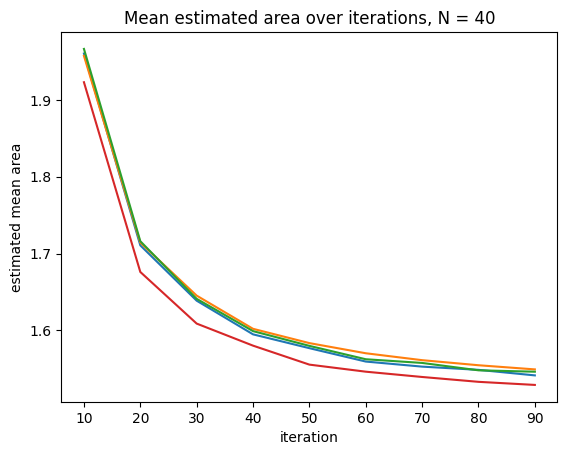

In [37]:
x = [i * intermediate_steps for i in range(10)]
plt.plot(x[1:], average_lengths_uniform[1:])
plt.plot(x[1:], average_lengths_lhs[1:])
plt.plot(x[1:], average_lengths_ortho[1:])
plt.plot(x[1:], average_lengths_cutout[1:])
plt.title(f'Number of points in Mandelbrot, N = {repetitions}')
plt.xlabel('iteration')
plt.ylabel('# of points beloning to Mandelbrot set')

plt.figure()
plt.plot(x[1:], average_areas_uniform[1:])
plt.plot(x[1:], average_areas_lhs[1:])
plt.plot(x[1:], average_areas_ortho[1:])
plt.plot(x[1:], average_areas_cutout[1:])
plt.title(f'Mean estimated area over iterations, N = {repetitions}')
plt.xlabel('iteration')
plt.ylabel('estimated mean area')

Text(0, 0.5, '$\\delta A$')

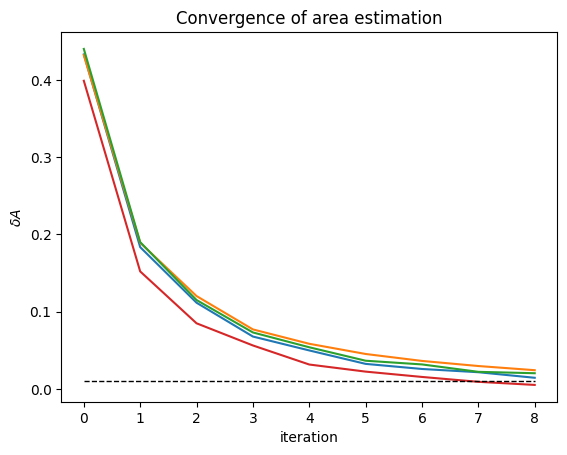

In [39]:
best_area_value_uniform = 1.527021
best_area_value_lhs = 1.5249972
best_area_value_ortho = 1.525929
best_area_value_cutout = 1.5238682060290496

errors_uniform = calculate_error_over_iterations(best_area_value_uniform, average_areas_uniform)
errors_lhs = calculate_error_over_iterations(best_area_value_lhs, average_areas_lhs)
errors_ortho = calculate_error_over_iterations(best_area_value_ortho, average_areas_ortho)
errors_cutout= calculate_error_over_iterations(best_area_value_cutout, average_areas_cutout)

plt.plot(errors_uniform[1:])
plt.plot(errors_lhs[1:])
plt.plot(errors_ortho[1:])
plt.plot(errors_cutout[1:])
plt.plot([0.01 for i in range(len(errors_cutout) - 1)], 'k--', linewidth=1)
plt.title('Convergence of area estimation')
plt.xlabel('iteration')
plt.ylabel('$\delta A$')

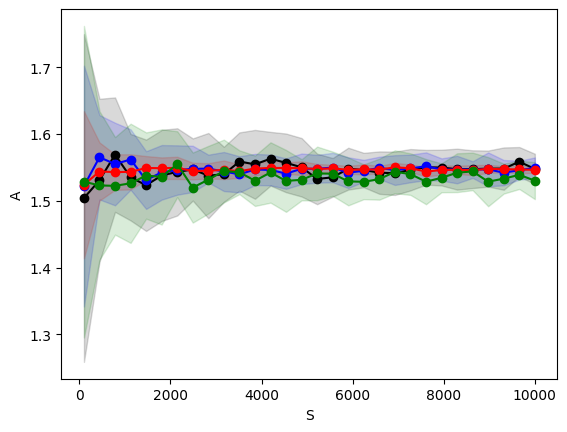

In [19]:
sample_sizes = np.linspace(int(1E2), int(1E4), num=30).astype(int)
methods=['uniform', 'lhs', 'ortho', 'cutout']
areas, stds = plot_area_vs_sample_size(sample_sizes=sample_sizes, repetitions=30, iterations=100, iteration_step=10, methods=methods)

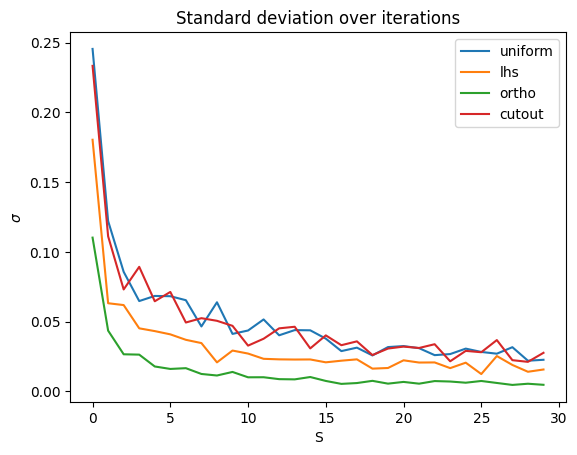

In [20]:
for i, std in enumerate(stds):
    plt.plot(std, label=methods[i])
plt.title('Standard deviation over iterations')
plt.xlabel('S')
plt.ylabel('$\sigma$')
plt.legend()

In [21]:
from scipy.stats import shapiro

for i, data in enumerate(areas):

    statistic, p_value = shapiro(data)

    # Output the results
    print(f"Shapiro-Wilk for {methods[i]}: p_value = {p_value:.4f}")


Shapiro-Wilk for uniform: p_value = 0.0516
Shapiro-Wilk for lhs: p_value = 0.0013
Shapiro-Wilk for ortho: p_value = 0.0000
Shapiro-Wilk for cutout: p_value = 0.3858


In [23]:
from scipy.stats import ttest_ind
output = []
for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods):
        if method1 != method2:
            t_statistic, p_value = ttest_ind(areas[i], areas[j])
            result = f'{method1} vs {method2} p_value = {p_value}'
            result_reverse = f'{method2} vs {method1} p_value = {p_value}'
            if (result not in output) and (result_reverse not in output):
                output.append(result)
                print(result)

uniform vs lhs p_value = 0.5398127574312764
uniform vs ortho p_value = 0.5609357197158964
uniform vs cutout p_value = 0.0003895161600240852
lhs vs ortho p_value = 0.8890293392599637
lhs vs cutout p_value = 2.3735686019812764e-07
ortho vs cutout p_value = 4.347289981432411e-09


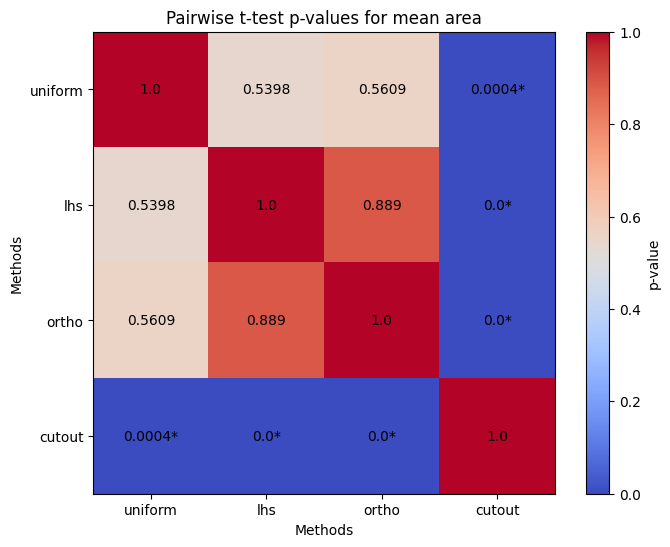

In [24]:
data = areas
methods = ['uniform', 'lhs', 'ortho', 'cutout']

num_methods = len(data)
p_values_matrix = np.empty((num_methods, num_methods), dtype=object)

# pairwise t-tests for each position
for i in range(num_methods):
    for j in range(num_methods):
        _, p_value = ttest_ind(data[i], data[j])
        p_values_matrix[i, j] = round(p_value, 4)  
plt.figure(figsize=(8, 6))
plt.imshow(np.array(p_values_matrix, dtype=float), cmap='coolwarm', interpolation='nearest')

# add significant markers
for i in range(num_methods):
    for j in range(num_methods):
        if p_values_matrix[i, j] < 0.05:  
            plt.text(j, i, f"{p_values_matrix[i, j]}*", ha='center', va='center', color='black')
        else:
            plt.text(j, i, str(p_values_matrix[i, j]), ha='center', va='center', color='black')

plt.colorbar(label='p-value')
plt.title('Pairwise t-test p-values for mean area')
plt.xticks(np.arange(num_methods), methods)
plt.yticks(np.arange(num_methods), methods)
plt.xlabel('Methods')
plt.ylabel('Methods')
plt.grid(False)
plt.show()

In [25]:
from scipy.stats import shapiro

for i, data in enumerate(stds):

    statistic, p_value = shapiro(data)

    # Output the results
    print(f"Shapiro-Wilk for {methods[i]}: p_value = {p_value:.4f}")


Shapiro-Wilk for uniform: p_value = 0.0000
Shapiro-Wilk for lhs: p_value = 0.0000
Shapiro-Wilk for ortho: p_value = 0.0000
Shapiro-Wilk for cutout: p_value = 0.0000


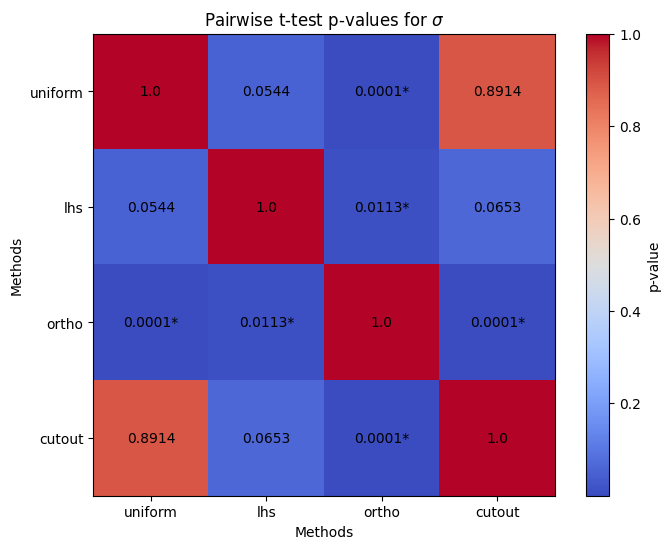

In [26]:
data = stds
methods = ['uniform', 'lhs', 'ortho', 'cutout']

num_methods = len(data)
p_values_matrix = np.empty((num_methods, num_methods), dtype=object)

# pairwise t-tests for each position
for i in range(num_methods):
    for j in range(num_methods):
        _, p_value = ttest_ind(data[i], data[j])
        p_values_matrix[i, j] = round(p_value, 4)  

plt.figure(figsize=(8, 6))
plt.imshow(np.array(p_values_matrix, dtype=float), cmap='coolwarm', interpolation='nearest')

# add significant markers
for i in range(num_methods):
    for j in range(num_methods):
        if p_values_matrix[i, j] < 0.05: 
            plt.text(j, i, f"{p_values_matrix[i, j]}*", ha='center', va='center', color='black')
        else:
            plt.text(j, i, str(p_values_matrix[i, j]), ha='center', va='center', color='black')

plt.colorbar(label='p-value')
plt.title('Pairwise t-test p-values for $\sigma$')
plt.xticks(np.arange(num_methods), methods)
plt.yticks(np.arange(num_methods), methods)
plt.xlabel('Methods')
plt.ylabel('Methods')
plt.grid(False)
plt.show()

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Uniform samples with cutout')

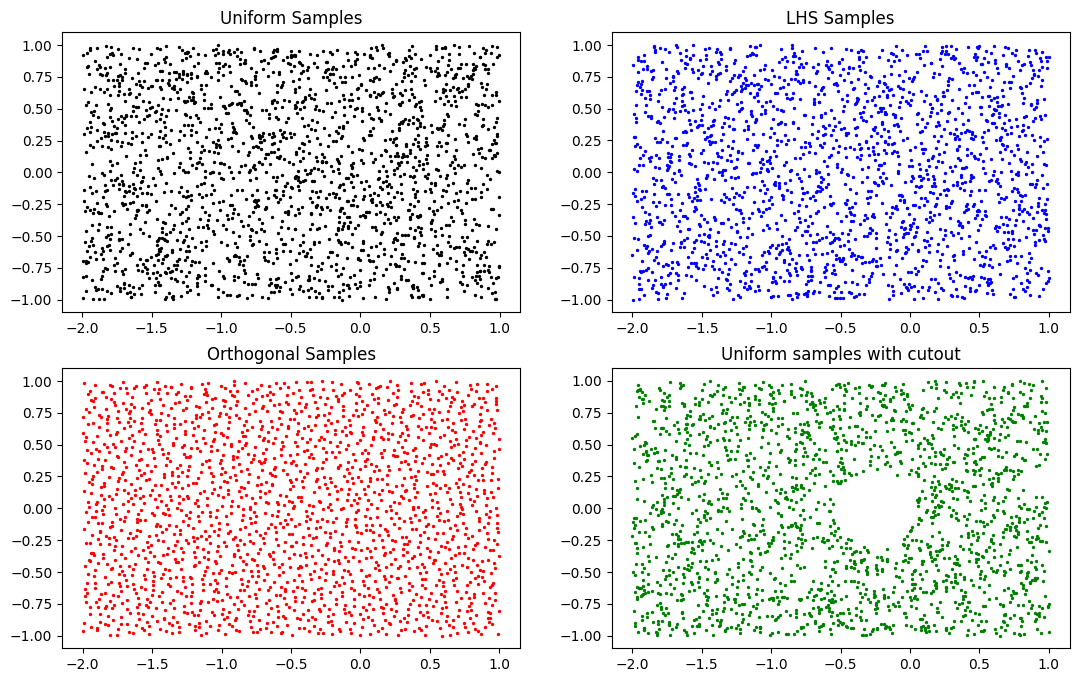

In [17]:
num_points = 2000

uniform_sample = complex_random_array(num_points)
lhs_sample = complex_random_array(num_points, method='lhs')
ortho_sample = complex_random_array(num_points, method='ortho')
cutout_sample, _ = complex_random_array(num_points, method='cutout')
print(type(ortho_sample))

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(13)
fig.set_figheight(8)
axs[0,0].scatter(uniform_sample.real, uniform_sample.imag, label="Uniform Samples", c='k', s=2)
axs[0,1].scatter(lhs_sample.real, lhs_sample.imag, label="LHS Samples", c='b', s=2)
axs[1,0].scatter(ortho_sample.real, ortho_sample.imag, label="Orthogonal Samples", c='r', s=2)
axs[1,1].scatter(cutout_sample.real, cutout_sample.imag, label="Uniform samples with cutout", c='g', s=2)

axs[0, 0].set_title("Uniform Samples")
axs[0, 1].set_title("LHS Samples")
axs[1, 0].set_title("Orthogonal Samples")
axs[1, 1].set_title("Uniform samples with cutout")

c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:11: RuntimeWarning: overflow encountered in scalar multiply
  z.append(z[k] * z[k] + c)
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  z.append(z[k] * z[k] + c)
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar multiply
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar add
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))


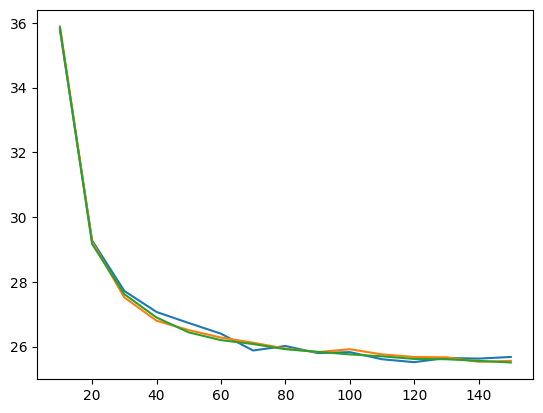

In [4]:
num_points = int(1E5)
iterations_array = [(i+1)*10 for i in range(15)]

mand_sizes_uniform = []
mand_sizes_lhs = []
mand_sizes_ortho = []
for i in iterations_array:
    c_array_uniform = complex_random_array(num_points)
    c_array_lhs = complex_random_array(num_points, method='lhs')
    c_array_ortho = complex_random_array(num_points, method='ortho')

    mand_set_uniform = generate_mandelbrot(0, c_array_uniform, i, 10, 2)
    mand_set_lhs = generate_mandelbrot(0, c_array_lhs, i, 10, 2)
    mand_set_ortho = generate_mandelbrot(0, c_array_ortho, i, 10, 2)

    mand_sizes_uniform.append(len(mand_set_uniform))
    mand_sizes_lhs.append(len(mand_set_lhs))
    mand_sizes_ortho.append(len(mand_set_ortho))

plt.plot(iterations_array, np.round(np.divide(mand_sizes_uniform, num_points) * 100, 2))
plt.plot(iterations_array, np.round(np.divide(mand_sizes_lhs, num_points) * 100, 2))
plt.plot(iterations_array, np.round(np.divide(mand_sizes_ortho, num_points) * 100, 2))